In [5]:
# from google.colab import drive
pwd

NameError: name 'pwd' is not defined

In [34]:
# drive.mount("/content/drive")
!pip install keras==2.2.4
!pip install tensorflow==1.14.0

     |████████████████████████████████| 312 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 6.3 MB/s  eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires keras<2.11,>=2.10.0, but you have keras 2.2.4 which is incompatible.
tensorflow-text 2.7.3 requires tensorflow<2.8,>=2.7.0, but you have tensorflow 2.10.0 which is incompatible.
autoai-ts-libs 1.1.9 requires tensorflow<2.8,>=2.7.0; python_version >= "3.9", but you have tensorflow 2.10.0 which is incompatible.
ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.

In [7]:
# import zipfile
# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Main.zip", 'r')
# zip_ref.extractall("/content/drive/MyDrive/GestureDataset")
# zip_ref.close()
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Xr0HOz2Ip2s-XZPHooZhDz7391EGb7ekHyzrVhJa3qfL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'gesturebasedtoolforsterilebrowsin-donotdelete-pr-z1apg45faayaih'
object_key = 'Main.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [9]:
pwd

'/home/wsuser/work'

In [10]:
import os
filenames = os.listdir('/home/wsuser/work/data')

In [36]:
import cv2
import numpy as np
import os
import pickle
import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
import glob

In [37]:
def segment(image, threshold=25):
    global bg
    diff = cv2.absdiff(bg.astype("uint8"), image)

    thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

    (cnts, _) = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(cnts) == 0:
        return
    else:
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)

In [38]:
DATASET_PATH = '/home/wsuser/work/data'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path

['/home/wsuser/work/data/thumbsup',
 '/home/wsuser/work/data/fist',
 '/home/wsuser/work/data/thumbsdown',
 '/home/wsuser/work/data/blank',
 '/home/wsuser/work/data/five',
 '/home/wsuser/work/data/ok']

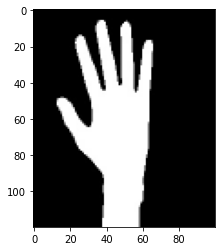

In [39]:
import cv2
image = cv2.imread('/home/wsuser/work/data/five/hand1(393).jpg')
image = cv2.resize(image,(100, 120))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [40]:
loaded_images = []

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

for path in range(0, len(dataset_path)):
    dataset_path = "/home/wsuser/work/data/" + str(list_of_gestures[path])
    gesture_path = os.path.join(dataset_path, '*')
    import glob
    gest_path = glob.glob(gesture_path)
    k = 0
    for i in range(0, len(gest_path)):
        if k < 1600:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,(100, 120))
            loaded_images.append(gray_image)
        k=k+1
print(len(loaded_images))

outputVectors = []
for i in range(1, 1601):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 0, 1])

print(len(outputVectors))

9600
9600


In [41]:
X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)

(9600, 120, 100)
(9600, 6)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)
print(X_train.shape)
print(X_test.shape)

(7680, 100, 120, 1)
(1920, 100, 120, 1)


In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

optimiser = Adam() 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 118, 32)       320       
                                                                 
 batch_normalization_2 (Batc  (None, 98, 118, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 49, 59, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 57, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 47, 57, 64)      

In [44]:
# Training the model with data
model.fit(X_train, y_train,
          batch_size=128,
          epochs=8,
          verbose=1,
          validation_data=(X_test, y_test))
filename = 'new_train_model.sav'
pickle.dump(model, open(filename, 'wb'))
model.save("new_train_model.h5")

Epoch 1/8
60/60 [==============================] - 182s 3s/step - loss: 2.0397 - categorical_accuracy: 0.7870 - val_loss: 0.1587 - val_categorical_accuracy: 0.9474
Epoch 2/8
60/60 [==============================] - 183s 3s/step - loss: 0.2088 - categorical_accuracy: 0.9108 - val_loss: 0.1313 - val_categorical_accuracy: 0.9453
Epoch 3/8
60/60 [==============================] - 185s 3s/step - loss: 0.1547 - categorical_accuracy: 0.9327 - val_loss: 0.1409 - val_categorical_accuracy: 0.9495
Epoch 4/8
60/60 [==============================] - 188s 3s/step - loss: 0.1302 - categorical_accuracy: 0.9408 - val_loss: 0.1346 - val_categorical_accuracy: 0.9495
Epoch 5/8
60/60 [==============================] - 186s 3s/step - loss: 0.1100 - categorical_accuracy: 0.9471 - val_loss: 0.1086 - val_categorical_accuracy: 0.9609
Epoch 6/8
60/60 [==============================] - 186s 3s/step - loss: 0.0897 - categorical_accuracy: 0.9572 - val_loss: 0.3979 - val_categorical_accuracy: 0.9245
Epoch 7/8
60/60 

INFO:tensorflow:Assets written to: ram://146f9f08-dc8f-4a9d-87f7-cbb67627eff0/assets


INFO:tensorflow:Assets written to: ram://146f9f08-dc8f-4a9d-87f7-cbb67627eff0/assets


In [47]:
!tar -zcvf gesture-model.tgz new_train_model.h5

new_train_model.h5


In [48]:
ls -1

data/
gesture-model.tgz
new_train_model.h5
new_train_model.sav


In [ ]:
# [loss, acc] = model.evaluate(X_test,y_test,verbose=1)
# print("Accuracy: " + str(acc*100)+"%")

60/60 [==============================] - 1s 8ms/step - loss: 0.0117 - categorical_accuracy: 0.9969
Accuracy: 99.6874988079071%


In [49]:
!pip install watson-machine-learning-client --upgrade

In [50]:
from ibm_watson_machine_learning import APIClient 
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "pRICfPi2WUbjuVJApM8QDMwsEDATYi3NKb_6pouqq4ed"
}
client = APIClient(wml_credentials)

In [51]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space["resources"] if item["entity"]["name"]==space_name)["metadata"]["id"])

In [52]:
space_uid = guid_from_space_name(client, "gestureidentification")
print("Space UID=" + space_uid)

Space UID=96dfd453-6d74-461b-b75b-0f3ec33e8f94


In [53]:
client.set.default_space(space_uid)

'SUCCESS'

In [54]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [102]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [104]:
model_details = client.repository.store_model(model = "gesture-model.tgz",meta_props={
client.repository.ModelMetaNames.NAME:"CNN",
client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
            )
model_id = client.repository.get_model_id(model_details)

In [105]:
model_id

'ea40629b-9947-41c0-b0dc-123c51a6132f'

In [106]:
client.repository.download(model_id, "gesture-model.tgz")

WMLClientError: File with name: 'gesture-model.tgz' already exists.